# <font color='blue'>Data Science Academy</font>
# <font color='blue'>Análise Estatística Para Data Science com Linguagem Python</font>

## <font color='blue'>Estudo de Caso 1</font>
### <font color='blue'>Análise Estatística com Regressão Stepwise Para Seleção de Atributos</font>

![title](imagens/EC1.png)

## Instalando e Carregando os Pacotes

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.9.18


In [ ]:
# Para atualizar um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install -U nome_pacote

# Para instalar a versão exata de um pacote, execute o comando abaixo no terminal ou prompt de comando:
# !pip install nome_pacote==versão_desejada

# Depois de instalar ou atualizar o pacote, reinicie o jupyter notebook.

# Instala o pacote watermark. 
# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook.
# !pip install -q -U watermark

In [ ]:
# !pip install -q numpy==1.22.2

In [ ]:
# https://pypi.org/project/skimpy/
# !pip install -q skimpy

In [2]:
# Imports
import sklearn
import numpy as np 
import pandas as pd
import skimpy
from skimpy import skim
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Data Science Academy" --iversions

Author: Data Science Academy

skimpy     : 0.0.14
statsmodels: 0.14.1
numpy      : 1.26.4
pandas     : 2.1.4
matplotlib : 3.8.2
seaborn    : 0.13.2
sklearn    : 1.3.2



## Carregando e Explorando os Dados

In [4]:
df = pd.read_csv("dados/dataset.csv")

In [5]:
# Remove o espaço no nome das variáveis
df = df.rename(columns = lambda x: x.strip())

In [6]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 2938   │ │ float64     │ 16    │                                                          │
│ │ Number of columns │ 22     │ │ int64       │ 4     │                                                          │
│ └───────────────────┴────────┘ │ string      │ 2     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name  ┃ NA  ┃ NA %  ┃ mean     ┃ sd       ┃ p0   ┃ p25    ┃ p50     ┃ p75     ┃ p100       ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━┩  │
│ │ Year         │   0 │     0 │     2000 │      4.6 │ 2000 │   2000 │    2000 │    2000 │       2000 │ ▇▅▇▅▇▇ │  │
│ │ Life         │  10 │  0.34 │       69 │      9.5 │   36 │     63 │      72 │      76 │         89 │  ▁▃▅▇▂ │  │
│ │ expectancy   │     │       │          │          │      │        │         │         │            │        │  │
│ │ Adult        │  10 │  0.34 │      160 │      120 │    1 │     74 │     140 │     230 │        720 │  ▇▇▃▁  │  │
│ │ Mortality    │     │       │          │          │      │        │         │         │            │        │  │
│ │ infant       │   0 │     0 │       30 │      120 │    0 │      0 │       3 │      22 │       1800 │   ▇    │  │
│ │ deaths       │     │       │          │          │      │        │         │         │            │        │  │
│ │ Alcohol      │ 194 │   6.6 │      4.6 │      4.1 │ 0.01 │   0.88 │     3.8 │     7.7 │         18 │ ▇▃▃▂▁  │  │
│ │ percentage   │   0 │     0 │      740 │     2000 │    0 │    4.7 │      65 │     440 │      19000 │   ▇    │  │
│ │ expenditure  │     │       │          │          │      │        │         │         │            │        │  │
│ │ Hepatitis B  │ 553 │ 18.82 │       81 │       25 │    1 │     77 │      92 │      97 │         99 │ ▁  ▁▂▇ │  │
│ │ Measles      │   0 │     0 │     2400 │    11000 │    0 │      0 │      17 │     360 │     210000 │   ▇    │  │
│ │ BMI          │  34 │  1.16 │       38 │       20 │    1 │     19 │      44 │      56 │         87 │ ▃▆▃▇▃  │  │
│ │ under-five   │   0 │     0 │       42 │      160 │    0 │      0 │       4 │      28 │       2500 │   ▇    │  │
│ │ deaths       │     │       │          │          │      │        │         │         │            │        │  │
│ │ Polio        │  19 │  0.65 │       83 │       23 │    3 │     78 │      93 │      97 │         99 │ ▁  ▁▂▇ │  │
│ │ Total        │ 226 │  7.69 │      5.9 │      2.5 │ 0.37 │    4.3 │     5.8 │     7.5 │         18 │  ▂▇▆▂  │  │
│ │ expenditure  │     │       │          │          │      │        │         │         │            │        │  │
│ │ Diphtheria   │  19 │  0.65 │       82 │       24 │    2 │     78 │      93 │      97 │         99 │ ▁  ▁▂▇ │  │
│ │ HIV/AIDS     │   0 │     0 │      1.7 │      5.1 │  0.1 │    0.1 │     0.1 │     0.8 │         51 │   ▇    │  │
│ │ GDP          │ 448 │ 15.25 │     7500 │    14000 │  1.7 │    460 │    1800 │    5900 │     120000 │   ▇▁   │  │
│ │ Population   │ 652 │ 22.19 │ 13000000 │ 61000000 │  

In [7]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [8]:
# Variáveis Numéricas
num_col = df.select_dtypes(include = np.number).columns
print("Variáveis Numéricas: \n", num_col)

Variáveis Numéricas: 
 Index(['Year', 'Life expectancy', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI',
       'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')


In [9]:
# Variáveis Categóricas
cat_col = df.select_dtypes(exclude = np.number).columns
print("Váriaveis Categóricas: \n", cat_col)

Váriaveis Categóricas: 
 Index(['Country', 'Status'], dtype='object')


## Pré-Processamento dos Dados

Não usaremos a coluna **Country**, então vamos transformar apenas a outra variável categórica.

In [10]:
# Cria o objeto
label_encoder = LabelEncoder()

In [11]:
# Encode da coluna Status 
df['Status'] = label_encoder.fit_transform(df['Status'])

In [12]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,1,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,1,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,1,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,1,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,1,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [13]:
# Função para checar a assimetria dos dados e então tratar valores ausentes
def trata_valores_ausentes(df):
    
    # Lista de variáveis com assimetria alta
    assimetria_alta = []
    
    # Lista de variáveis com assimetria moderada
    assimetria_moderada = []
    
    # Loop
    for i, j in df.skew().items():
        
        # Condição para assimetria alta
        if (j < -1) or (j > 1):
            
            # Coloca o nome da variável na lista
            assimetria_alta.append(i)
            
            # Preenche valores ausentes com a mediana
            df[i].fillna(df[i].median(), inplace = True)
            
        # Condição para assimetria moderada
        elif (-1 > j > -0.5) or (0.5 < j <  1):
            
            # Coloca o nome da variável na lista
            assimetria_moderada.append(i)
            
            # Preenche valores ausentes com a média
            df[i].fillna(df[i].mean(), inplace = True)
        else:
            pass
        
    print("\nVariáveis com assimetria alta:\n")
    print(assimetria_alta)
    print("\nVariáveis com assimetria moderada:\n")
    print(assimetria_moderada)
    print("\nValores ausentes:\n")
    print(df.isnull().sum())

In [15]:
trata_valores_ausentes(df.iloc[:,1:])


Variáveis com assimetria alta:

['Status', 'Adult Mortality', 'infant deaths', 'percentage expenditure', 'Hepatitis B', 'Measles', 'under-five deaths', 'Polio', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years', 'thinness 5-9 years', 'Income composition of resources']

Variáveis com assimetria moderada:

['Alcohol', 'Total expenditure']

Valores ausentes:

Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                      0
infant deaths                        0
Alcohol                              0
percentage expenditure               0
Hepatitis B                          0
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                                0
Total expenditure                    0
Diphtheria                           0
HIV/AIDS                             0
GDP                                

> Ainda há 3 variáveis com valores ausentes. Vamos resolver isso.

In [16]:
# Interpolação - preenche valores ausentes com a média
df['BMI'] = df['BMI'].fillna(df['BMI'].mean())

In [17]:
# Interpolação - preenche valores ausentes com a média
df['Schooling'] = df['Schooling'].fillna(df['Schooling'].mean())

In [18]:
print(df.isna().sum())

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                  0
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                            0
dtype: int64


In [19]:
print(df.shape)

(2938, 22)


In [20]:
# Para a variável alvo vamos apenas remover as linhas com valores ausentes
df = df.dropna()

In [21]:
print(df.isna().sum())

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64


In [22]:
print(df.shape)

(1649, 22)


## Análise Exploratória

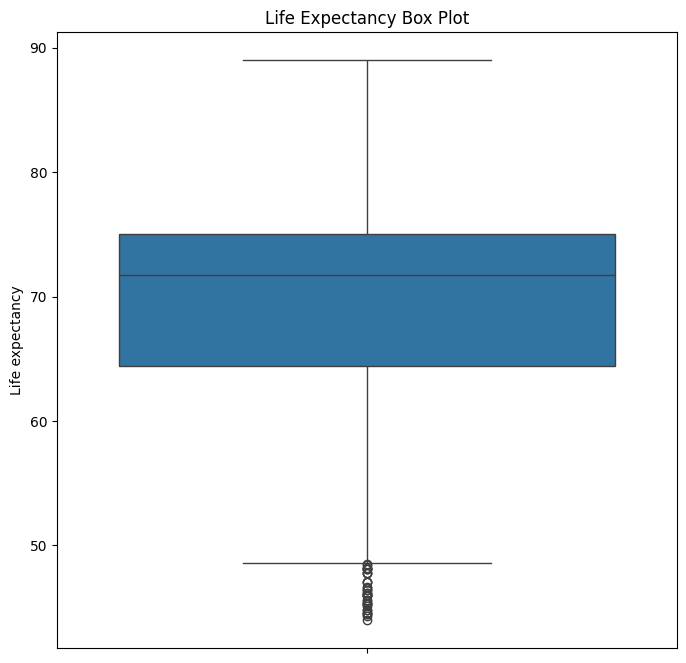

In [23]:
# Verifica a distribuição da variável alvo (Life Expectancy)
plt.figure(figsize = (8,8))
sns.boxplot(data = df['Life expectancy'])
plt.title('Life Expectancy Box Plot')
plt.show()

<Figure size 800x800 with 0 Axes>

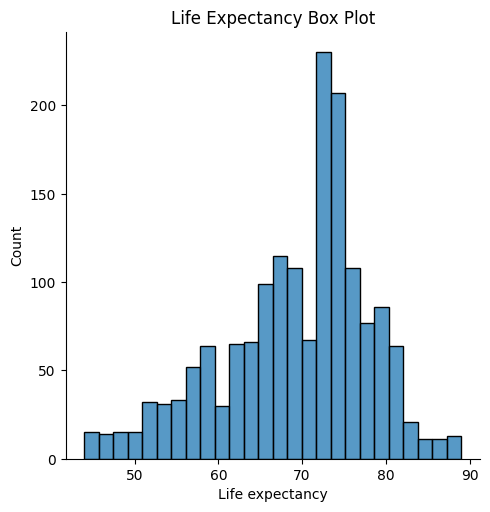

In [24]:
plt.figure(figsize = (8,8))
sns.displot(df['Life expectancy'])
plt.title('Life Expectancy Box Plot')
plt.show()

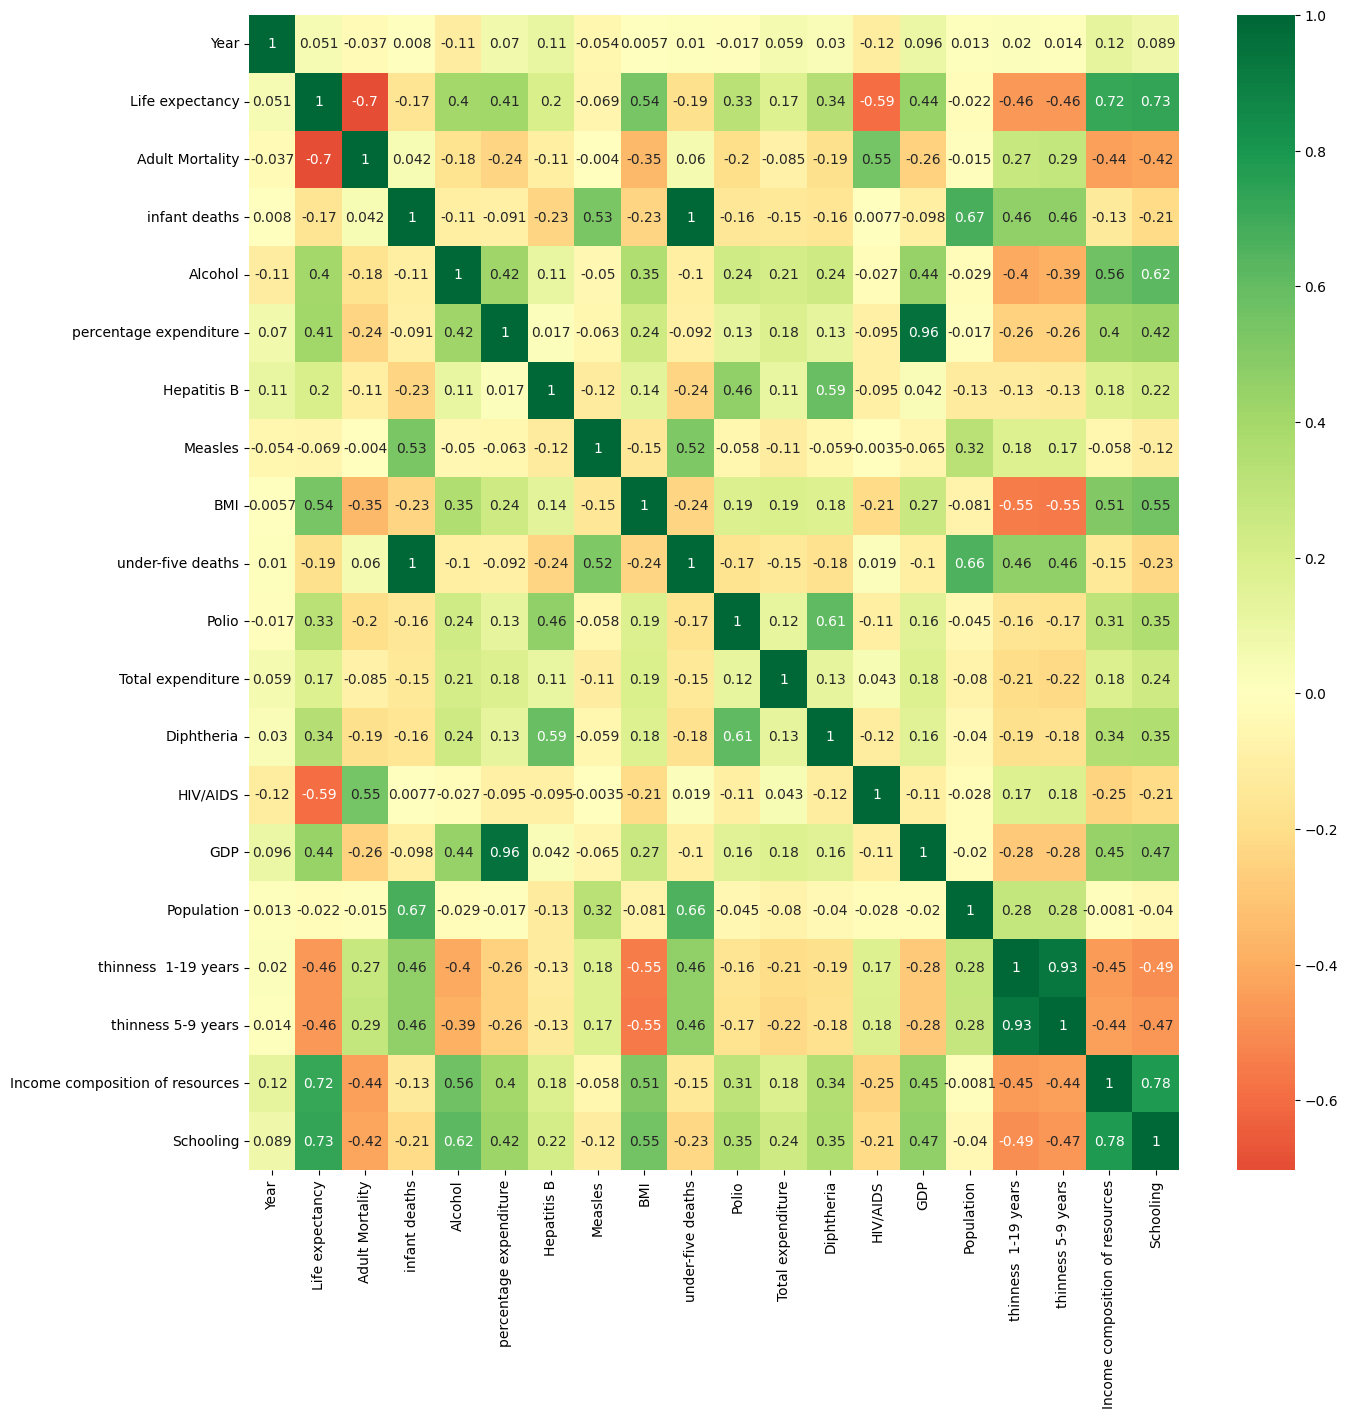

In [25]:
# Matriz de correlação
plt.figure(figsize = (15, 15))
p = sns.heatmap(df[num_col].corr(), annot = True, cmap = 'RdYlGn', center = 0)

## Preparação dos Dados

Não usaremos a variável que indica o país, já que isso deixaria a análise bastante tendenciosa. Queremos compreender os fatores que mais influenciam a expectativa de vida, independente do país.

In [26]:
X = df.drop(columns = ['Life expectancy', 'Country'])

In [27]:
y = df[['Life expectancy']]

In [28]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.3, random_state = 1234)

## Abordagem 1 - Stepwise Manual

### Versão 1 do Modelo com 1 Variável Preditora

In [29]:
# Selecionando uma variável preditora com alta correlação positiva com a variável alvo
X_treino_1 = X_treino['Schooling']

In [30]:
# Adiciona a constante (requerido pelo Statsmodels)
X_treino_1 = sm.add_constant(X_treino_1)

In [31]:
# Cria a primeira versão do modelo
modelo_v1 = sm.OLS(y_treino, X_treino_1).fit()

In [32]:
# Verifica os parâmetros
modelo_v1.params

const        41.567912
Schooling     2.297811
dtype: float64

In [33]:
# Sumário
print(modelo_v1.summary())

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.536
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                     1333.
Date:                Fri, 08 Mar 2024   Prob (F-statistic):          1.72e-194
Time:                        10:15:28   Log-Likelihood:                -3695.5
No. Observations:                1154   AIC:                             7395.
Df Residuals:                    1152   BIC:                             7405.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.5679      0.787     52.790      0.0

O R-quadrado  (R2) é o coeficiente de determinação e pode assumir valores entre 0 e 1. Quando maior o valor do R-quadrado (R2), mais o modelo é capaz de explicar as variência da variável alvo.

Leia os manuais no Capítulo 5 para compreender como interpretar outros valores da tabela acima.

### Versão 2 do Modelo com 2 Variáveis Preditoras

In [34]:
# Usando duas variáveis de entrada com alta correlação positiva com a variável alvo
X_treino_2 = X_treino[['Schooling', 'Income composition of resources']]

In [35]:
# Adiciona a constante
X_treino_2 = sm.add_constant(X_treino_2)

In [36]:
# Segunda versão do modelo
modelo_v2 = sm.OLS(y_treino, X_treino_2).fit()

In [37]:
# Parâmetros aprendidos
modelo_v2.params

const                              41.448765
Schooling                           1.362955
Income composition of resources    18.126951
dtype: float64

In [38]:
# Sumário
print(modelo_v2.summary())

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.590
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     828.4
Date:                Fri, 08 Mar 2024   Prob (F-statistic):          1.28e-223
Time:                        10:16:15   Log-Likelihood:                -3624.4
No. Observations:                1154   AIC:                             7255.
Df Residuals:                    1151   BIC:                             7270.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

O R2 aumentou. Fica claro que aumentando o número de variáveis preditoras aumenta a capacidade do modelo de explicar a variável alvo. Vamos incluir mais uma variável preditora.

### Versão 3 do Modelo com 3 Variáveis Preditoras

In [39]:
# Criando o modelo com 3 variáveis, sendo duas com alta correlação positiva e uma com alta correlação negativa
# com a variável alvo
X_treino_3 = X_treino[['Schooling', 'Income composition of resources', 'Adult Mortality']]

In [40]:
# Adicona a constante
X_treino_3 = sm.add_constant(X_treino_3)

In [41]:
# Cria a terceira versão do modelo
modelo_v3 = sm.OLS(y_treino, X_treino_3).fit()

In [42]:
# Parâmetros
modelo_v3.params

const                              53.942203
Schooling                           1.074392
Income composition of resources    12.044169
Adult Mortality                    -0.030965
dtype: float64

In [43]:
# Sumário
print(modelo_v3.summary())

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     1079.
Date:                Fri, 08 Mar 2024   Prob (F-statistic):               0.00
Time:                        10:16:55   Log-Likelihood:                -3366.6
No. Observations:                1154   AIC:                             6741.
Df Residuals:                    1150   BIC:                             6761.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

Atingimos um R-quadrado de `0,72` selecionando manualmente as variáveis altamente correlacionadas. Mas observe que o modelo agora parece ter problema com variáveis preditoras altamente correlacionadas entre si. Isso chama-se multicolinearidade e é um problema em regressão.

Antes de usar o RFE para selecionar as variáveis independentes que prevêem com precisão a variável dependente 'Expectativa de vida, vamos padronizar os dados.

In [44]:
# Criando o modelo com 3 variáveis, sendo duas com alta correlação positiva e uma com alta correlação negativa
# com a variável alvo
X_treino_4 = X_treino[['Income composition of resources', 'Schooling', 'Adult Mortality']]

In [45]:
# Cria o padronizador
scaler = StandardScaler()

In [46]:
# Treina e aplica o padronizador em dados de treino
X_scaled = scaler.fit_transform(X_treino_4)

In [47]:
# Adiciona uma constante para o termo de interceptação
X_scaled = sm.add_constant(X_scaled)

In [48]:
# Treina o modelo com os dados padronizados
modelo_v4 = sm.OLS(y_treino, X_scaled).fit()

In [49]:
# Imprima a saída do modelo
print(modelo_v4.summary())

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     1079.
Date:                Fri, 08 Mar 2024   Prob (F-statistic):               0.00
Time:                        10:17:46   Log-Likelihood:                -3366.6
No. Observations:                1154   AIC:                             6741.
Df Residuals:                    1150   BIC:                             6761.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         69.5912      0.132    527.441      0.0

## Abordagem 2 - RFE (Recursive Feature Elimination)

Recursive Feature Elimination (RFE) é uma técnica de seleção de recursos em Python que usa um modelo de aprendizado de máquina para selecionar um subconjunto de recursos mais relevantes para um problema específico. A RFE é uma técnica de seleção de recursos baseada em modelo que busca o subconjunto ótimo de recursos para o modelo de aprendizado de máquina.

O processo de RFE começa treinando o modelo de aprendizado de máquina com todos os recursos disponíveis. Em seguida, os recursos menos importantes são removidos do conjunto de recursos, e o modelo é treinado novamente com os recursos restantes. Esse processo é repetido até que seja alcançado um número pré-definido de recursos ou até que o desempenho do modelo não melhore mais.

A RFE pode ser usada com vários modelos de aprendizado de máquina, como regressão linear, regressão logística, árvores de decisão, entre outros. A RFE usa a precisão do modelo como métrica para selecionar os recursos mais importantes.

O Stepwise com RFE (Recursive Feature Elimination) é um método de seleção de características que utiliza tanto uma abordagem de frente para trás quanto uma abordagem de retrocesso. O objetivo é encontrar a combinação de recursos que fornece o melhor desempenho para um modelo de aprendizado de máquina.

O processo funciona da seguinte maneira:

- Inicialmente, todas as características são incluídas no modelo.
- Em seguida, o modelo é treinado e avaliado com base nas características atuais.
- O recurso com o menor desempenho é removido.
- O processo é repetido, treinando e avaliando o modelo com a combinação de características restantes.
- Esse processo é repetido até que todos os recursos tenham sido avaliados e removidos ou até que se atinja uma condição de parada pré-definida, como um número mínimo de características ou uma acurácia mínima do modelo.

A Eliminação de Variáveis é feita com Base no Valor-p.

In [50]:
# Cria o padronizador
scaler = StandardScaler()

In [51]:
# Padroniza os dados de treino
X_treino_scaled = scaler.fit_transform(X_treino)

In [52]:
# Cria o modelo de regressão
lm = LinearRegression()

In [53]:
# Treino do modelo com todas as variáveis preditoras
lm.fit(X_treino_scaled, y_treino)

LinearRegression()

In [54]:
# Cria o modelo RFE
rfe = RFE(lm, step = 1)

In [55]:
# Treina o modelo RFE
rfe = rfe.fit(X_treino, y_treino)

In [56]:
list(zip(X_treino.columns, rfe.support_, rfe.ranking_))

[('Year', True, 1),
 ('Status', True, 1),
 ('Adult Mortality', False, 4),
 ('infant deaths', True, 1),
 ('Alcohol', True, 1),
 ('percentage expenditure', False, 8),
 ('Hepatitis B', False, 7),
 ('Measles', False, 9),
 ('BMI', False, 2),
 ('under-five deaths', True, 1),
 ('Polio', False, 5),
 ('Total expenditure', True, 1),
 ('Diphtheria', False, 6),
 ('HIV/AIDS', True, 1),
 ('GDP', False, 10),
 ('Population', False, 11),
 ('thinness  1-19 years', False, 3),
 ('thinness 5-9 years', True, 1),
 ('Income composition of resources', True, 1),
 ('Schooling', True, 1)]

In [57]:
# Selecionando os recursos importantes (usando a métrica suporte)
imp_columns = X_treino.columns[rfe.support_]

In [58]:
imp_columns

Index(['Year', 'Status', 'infant deaths', 'Alcohol', 'under-five deaths',
       'Total expenditure', 'HIV/AIDS', 'thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [59]:
# Criando dataframe X_treino_rfe com variáveis RFE selecionadas
X_treino_rfe = X_treino[imp_columns]

In [60]:
X_treino_rfe

,Year,Status,infant deaths,Alcohol,under-five deaths,Total expenditure,HIV/AIDS,thinness 5-9 years,Income composition of resources,Schooling
1652,2014,1,8,0.01,12,3.77,0.9,7.7,0.509,8.5
2491,2013,1,2,0.01,3,9.66,9.8,4.6,0.539,11.4
300,2003,1,1,0.52,1,4.90,0.2,19.1,0.000,8.4
855,2010,1,6,0.61,9,3.24,0.9,8.8,0.404,5.1
1388,2005,1,0,0.60,0,1.60,0.1,0.2,0.000,12.2
...,...,...,...,...,...,...,...,...,...,...
2067,2003,0,0,14.21,1,9.54,0.1,0.6,0.789,15.8
1816,2012,1,20,0.26,25,5.89,0.2,16.7,0.538,12.3
2272,2008,1,1,9.54,1,1.50,0.1,2.4,0.749,13.5
1285,2012,0,2,7.49,2,9.28,0.1,0.6,0.877,16.6


## Abordagem 3 - Stepwise com RFE e VIF 

Com as colunas selecionadas pelo RFE, avaliaremos manualmente o valor-p e o valor VIF de cada modelo.
A menos que encontremos o intervalo aceitável para valores-p e VIF, continuamos eliminando as variáveis uma de cada vez com base nos critérios abaixo.

- Valor-p alto e VIF alto: Elimina a variável
- Valor-p alto e VIF baixo: Elimina primeiro a variável com valor-p alto
- Valor-p baixo e VIF baixo: Aceita a variável

Variance Inflation Factor ou VIF, dá uma ideia quantitativa básica sobre o quanto as variáveis de recurso estão correlacionadas umas com as outras. É um parâmetro extremamente importante para testar nosso modelo linear. A fórmula para calcular `VIF` é:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

O Variance Inflation Factor (VIF) é uma medida utilizada para avaliar a colinearidade entre as variáveis independentes em um modelo de regressão linear. O VIF é calculado para cada variável independente e quantifica o quanto o aumento na variância de uma variável independente é inflado devido à presença de correlação com outras variáveis independentes no modelo.

A interpretação do VIF é a seguinte:

- Quando o VIF é igual a 1, não há colinearidade entre a variável independente em questão e as outras variáveis independentes no modelo.


- Um VIF entre 1 e 5 indica uma colinearidade moderada entre as variáveis independentes e pode ser aceitável.


- Um VIF maior que 5 indica uma forte colinearidade e pode ser um sinal de problemas com a interpretação do modelo. Nesse caso, considera-se remover uma das variáveis altamente correlacionadas.

In [61]:
# Padronizador
scaler = StandardScaler()

In [62]:
# Aplica o padronizador
X_treino_rfe_scaled = scaler.fit_transform(X_treino_rfe)

In [63]:
# Adiciona a constante
X_treino_rfec = sm.add_constant(X_treino_rfe_scaled)

In [64]:
# Cria o modelo com os atributos RFE
lm_ref = sm.OLS(y_treino, X_treino_rfec).fit()

In [65]:
# Sumário
print(lm_ref.summary())

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     432.4
Date:                Fri, 08 Mar 2024   Prob (F-statistic):               0.00
Time:                        10:20:40   Log-Likelihood:                -3236.0
No. Observations:                1154   AIC:                             6494.
Df Residuals:                    1143   BIC:                             6550.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         69.5912      0.118    588.831      0.0

In [66]:
# Cria o dataframe com variáveis e VIF
vif = pd.DataFrame()
vif['Features'] = X_treino_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_treino_rfe.values, i) for i in range(X_treino_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
4,under-five deaths,211.08
2,infant deaths,209.83
0,Year,67.33
9,Schooling,66.06
8,Income composition of resources,38.09
1,Status,11.32
5,Total expenditure,8.52
3,Alcohol,5.06
7,thinness 5-9 years,3.47
6,HIV/AIDS,1.26


In [68]:
# Drop da variável menos relevante
X_treino_rfe1 = X_treino_rfe.drop(columns=['under-five deaths'])

In [69]:
X_treino_rfe1_scaled = scaler.fit_transform(X_treino_rfe1)

In [70]:
X_treino_rfe1c = sm.add_constant(X_treino_rfe1_scaled)

In [71]:
lm_ref1 = sm.OLS(y_treino, X_treino_rfe1c).fit()

In [72]:
# Sumário
print(lm_ref1.summary())

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     445.9
Date:                Fri, 08 Mar 2024   Prob (F-statistic):               0.00
Time:                        10:22:46   Log-Likelihood:                -3270.1
No. Observations:                1154   AIC:                             6560.
Df Residuals:                    1144   BIC:                             6611.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         69.5912      0.122    571.911      0.0

In [73]:
# Na tabela VIF
vif = pd.DataFrame()
vif['Features'] = X_treino_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_treino_rfe1.values, i) for i in range(X_treino_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Year,65.61
8,Schooling,65.03
7,Income composition of resources,37.72
1,Status,11.32
4,Total expenditure,8.51
3,Alcohol,4.94
6,thinness 5-9 years,3.47
2,infant deaths,1.36
5,HIV/AIDS,1.25


In [74]:
# Drop da variável menos relevante
X_treino_rfe2 = X_treino_rfe1.drop(columns=['Year','Schooling'])

In [75]:
X_treino_rfe2_scaled = scaler.fit_transform(X_treino_rfe2)

In [76]:
X_treino_rfe2c = sm.add_constant(X_treino_rfe2_scaled)

In [77]:
lm_rfe2 = sm.OLS(y_treino, X_treino_rfe2c).fit()

In [78]:
# Sumário
print(lm_rfe2.summary())

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     429.7
Date:                Fri, 08 Mar 2024   Prob (F-statistic):          3.64e-315
Time:                        10:23:59   Log-Likelihood:                -3396.0
No. Observations:                1154   AIC:                             6808.
Df Residuals:                    1146   BIC:                             6848.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         69.5912      0.136    513.279      0.0

In [79]:
# Dataframe
vif = pd.DataFrame()
vif['Features'] = X_treino_rfe2.columns
vif['VIF'] = [variance_inflation_factor(X_treino_rfe2.values, i) for i in range(X_treino_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
6,Income composition of resources,13.28
3,Total expenditure,7.41
0,Status,6.62
2,Alcohol,4.45
5,thinness 5-9 years,2.93
1,infant deaths,1.34
4,HIV/AIDS,1.24


In [80]:
# Drop da variável menos relevante
X_treino_rfe3 = X_treino_rfe2.drop(columns=['Income composition of resources'])

In [81]:
X_treino_rfe3_scaled = scaler.fit_transform(X_treino_rfe3)

In [82]:
X_treino_rfe3c = sm.add_constant(X_treino_rfe3_scaled)

In [83]:
lm_rfe3 = sm.OLS(y_treino, X_treino_rfe3_scaled).fit()

In [84]:
print(lm_rfe3.summary())

                                 OLS Regression Results                                
Dep. Variable:        Life expectancy   R-squared (uncentered):                   0.009
Model:                            OLS   Adj. R-squared (uncentered):              0.004
Method:                 Least Squares   F-statistic:                              1.746
Date:                Fri, 08 Mar 2024   Prob (F-statistic):                       0.107
Time:                        10:33:08   Log-Likelihood:                         -6537.2
No. Observations:                1154   AIC:                                  1.309e+04
Df Residuals:                    1148   BIC:                                  1.312e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
# Dataframe


In [ ]:
# Drop da variável menos relevante


In [ ]:
# Dataframe


In [ ]:
# Drop da variável menos relevante


In [ ]:
# Dataframe


## Versão Final do Modelo

In [85]:
X_treino

,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1652,2014,1,26.0,8,0.01,80.926798,84.0,14,3.1,12,84.0,3.77,84.0,0.9,1326.668820,46392.0,8.0,7.7,0.509,8.5
2491,2013,1,393.0,2,0.01,708.955665,98.0,0,31.2,3,98.0,9.66,98.0,9.8,3598.759720,1271456.0,4.5,4.6,0.539,11.4
300,2003,1,273.0,1,0.52,19.156641,95.0,0,15.5,1,96.0,4.90,95.0,0.2,997.741714,623434.0,18.3,19.1,0.000,8.4
855,2010,1,298.0,6,0.61,17.357398,9.0,51,16.0,9,9.0,3.24,9.0,0.9,482.149940,43984.0,8.9,8.8,0.404,5.1
1388,2005,1,213.0,0,0.60,111.739213,5.0,0,72.1,0,74.0,1.60,79.0,0.1,1214.556667,92325.0,0.2,0.2,0.000,12.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2067,2003,0,15.0,0,14.21,2283.891796,94.0,8,52.5,1,96.0,9.54,99.0,0.1,15772.733400,1458821.0,0.7,0.6,0.789,15.8
1816,2012,1,167.0,20,0.26,80.587884,9.0,3362,17.4,25,9.0,5.89,9.0,0.2,681.792587,27649925.0,16.3,16.7,0.538,12.3
2272,2008,1,132.0,1,9.54,96.332379,93.0,2,55.8,1,95.0,1.50,95.0,0.1,671.773913,735222.0,2.3,2.4,0.749,13.5
1285,2012,0,6.0,2,7.49,4793.904924,96.0,376,62.1,2,96.0,9.28,97.0,0.1,34814.124360,59539717.0,0.5,0.6,0.877,16.6


In [89]:
X_treino_final = X_treino[['Status',
                           'thinness  1-19 years',
                           'BMI',
                           'infant deaths',
                           'HIV/AIDS']]

In [90]:
X_treino_final_scaled = scaler.fit_transform(X_treino_final)

In [91]:
X_treino_final_scaled = sm.add_constant(X_treino_final_scaled)

In [92]:
lm_stepwise = sm.OLS(y_treino, X_treino_final_scaled).fit()

In [93]:
# Sumário
print(lm_stepwise.summary())

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     354.6
Date:                Fri, 08 Mar 2024   Prob (F-statistic):          7.93e-230
Time:                        10:41:26   Log-Likelihood:                -3600.2
No. Observations:                1154   AIC:                             7212.
Df Residuals:                    1148   BIC:                             7243.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         69.5912      0.162    430.401      0.0

## Avaliação do Modelo

In [94]:
X_teste

,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2220,2012,1,194.0,0,0.01,8.198048,96.0,0,28.5,0,96.0,8.60,96.0,0.5,138.949959,182889.0,5.9,5.7,0.553,10.8
2372,2004,1,29.0,0,1.18,195.525942,81.0,0,41.3,0,89.0,5.64,9.0,0.1,818.442619,458324.0,1.3,1.3,0.459,8.1
1078,2011,1,29.0,28,0.22,42.254790,63.0,11,21.2,43,63.0,4.73,63.0,2.0,459.291200,113517.0,8.0,8.0,0.385,8.4
1390,2003,1,215.0,0,0.50,1.765413,73.0,0,7.6,0,79.0,9.98,7.0,0.1,115.386500,88895.0,0.2,0.2,0.000,11.6
578,2013,1,145.0,11,4.41,15.162555,91.0,1,56.4,13,91.0,6.84,91.0,0.1,83.586300,47342981.0,2.1,1.9,0.712,13.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2374,2002,1,22.0,0,1.08,156.284797,75.0,0,39.6,0,78.0,6.90,78.0,0.1,784.956287,435262.0,1.4,1.4,0.446,7.3
2206,2009,1,172.0,0,2.88,42.123684,44.0,0,72.0,0,45.0,5.40,49.0,0.1,335.112838,184826.0,0.2,0.2,0.691,12.9
1775,2004,1,429.0,82,1.54,46.581956,76.0,9396,18.1,120,69.0,5.91,83.0,15.9,336.331815,231275.0,3.9,3.8,0.332,7.0
135,2008,0,76.0,0,12.00,8329.731655,83.0,448,54.2,0,83.0,1.60,83.0,0.1,51386.376650,8321496.0,1.7,1.9,0.864,15.1


In [95]:
X_teste_final = X_teste[['Status',
                         'thinness  1-19 years',
                         'BMI',
                         'infant deaths',
                         'HIV/AIDS']]

In [97]:
X_teste_final_scaled = scaler.transform(X_teste_final)

In [98]:
X_teste_final_scaled = sm.add_constant(X_teste_final_scaled)

In [99]:
prediction = lm_stepwise.predict(X_teste_final_scaled)

In [100]:
actual = y_teste["Life expectancy"]

In [101]:
# MSE
metrica_mse = mean_squared_error(prediction, actual)

In [102]:
print(metrica_mse)

30.37556546081541


In [104]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [105]:
mean_absolute_percentage_error(actual, prediction)

6.782489777306557

In [107]:
# Relação Entre Valor Atual e Valor Previsto
sns.scatterplot(y_teste['Life expectancy'],prediction)
plt.title('Relação Entre Valor Atual e Valor Previsto')
plt.xlabel('Valor Atual')
plt.ylabel('Valor Previsto')

TypeError: scatterplot() takes from 0 to 1 positional arguments but 2 were given

Idealmente, a distribuição do erro de um modelo de regressão deve ser normal e ter média zero. Isso significa que os erros do modelo devem ter uma distribuição simétrica em torno de zero.

Além disso, a distribuição do erro de um modelo de regressão deve ter variância constante em toda a faixa de previsão. Isso é conhecido como homocedasticidade. Se a variância do erro aumentar à medida que a variável independente aumenta, isso é conhecido como heterocedasticidade.

A distribuição normal do erro é importante porque muitos modelos de regressão assumem que os erros seguem uma distribuição normal. Se a distribuição do erro não for normal, as estimativas dos parâmetros do modelo podem estar enviesadas e as previsões do modelo podem ser menos precisas. Além disso, a homocedasticidade é importante porque a variância constante é uma das suposições fundamentais da regressão linear.

Uma forma comum de verificar a normalidade e a homocedasticidade dos erros é visualizando os resíduos do modelo em um gráfico de probabilidade normal e um gráfico de resíduos versus valores ajustados (também conhecido como gráfico de dispersão). Se a distribuição dos resíduos for normal, os pontos no gráfico de probabilidade normal devem cair aproximadamente em uma linha reta. Se houver homocedasticidade, os pontos no gráfico de resíduos versus valores ajustados devem ser distribuídos aleatoriamente em torno de zero, sem uma tendência clara. Se houver heterocedasticidade, os pontos no gráfico de resíduos versus valores ajustados podem apresentar uma tendência clara de aumentar ou diminuir à medida que os valores ajustados aumentam.

Caso a distribuição do erro não seja normal e/ou a homocedasticidade não seja atendida, é possível utilizar técnicas de transformação de dados ou modelos estatísticos alternativos para tratar esses problemas.

Text(0.5, 9.444444444444438, 'Erros')

<Figure size 640x480 with 0 Axes>

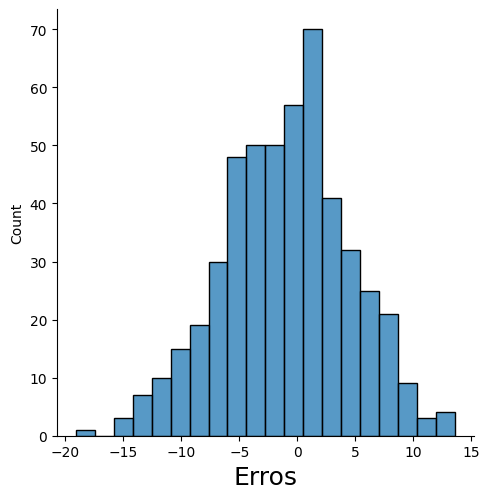

In [108]:
# Plot 
fig = plt.figure()
sns.displot((y_teste['Life expectancy'] - prediction), bins = 20)
fig.suptitle('Distribuição do Erro do Modelo', fontsize = 20)
plt.xlabel('Erros', fontsize = 18)

## Conclusão

As variáveis ['Status', 'BMI', 'thinness  1-19 years', 'infant deaths', 'HIV/AIDS'] ajudam a explicar a expectativa de vida de um país.

# Fim